# Signal Norm Analysis
## Paul Yollin


In [1]:
#   Documentation of Funfile and its contained functions and classes is
#   found in Funfile.
import Funfile as Fun
import numpy as np
import matplotlib.pyplot as plt

#   Setting parameters to be used
#   I added start and stop params to pull out the cleanest 40 seconds of each recording
params = {
    'f_ext': 'Hz_10v_erm_raw.fif',
    '5': {'start': 80, 'stop': 120},
    '20': {'start': 0, 'stop': 40},
    '70': {'start': 70, 'stop': 110},
    '105': {'start': 65, 'stop': 105}
}

Identity = np.diag(np.ones(333))

#### Defining functions to be used in analysis

In [2]:
#   defining function to plot the norms
def plot_norms_Sig_Norm_Analysis(data, tmin, tmax):
    
    #   Empty dictionary to hold the norm values 
    norm = {}
    
    #   for loop calculating the norm values, then saving the vector in the corresponding
    #   entry in the 'norm' dictionary
    for e in ['r_mdat', 'r_gdat', 'fc_mdat', 'fc_gdat']:
        norm[e] = np.linalg.norm(data[e], axis=0)
    del e

    #   Defning some values to be used in plotting
    fs = 1 / 1000       # sampling frequency
    start = int(tmin / fs)      # start index
    stop = int(tmax / fs)       # stop index
    rec_len = len(norm['r_mdat'])   # recording length
    xs = np.arange(0, rec_len) * fs     # vector to give x-axis values
    
    #   generating the figure and the axes to plot into
    fig, ax = plt.subplots(2, 1, figsize=(13, 9))
    
    #   for loop to plot magnetometer plot and gradiometer plot
    for j, e in enumerate(['m', 'g']):
        
        # generating the affix for indexing into the norm dictionary
        ind_name = e + 'dat'
        
        # plotting the vector norms as a function of time, named 'line' so i can later label it
        line = ax[j].plot(
            xs[start:stop], norm['r_' + ind_name][start:stop], 'k',     # plotting raw vector norms
            xs[start:stop], norm['fc_' + ind_name][start:stop], 'b',    # plotting filtered vec norms
            linewidth=1     # setting linewidth
        )
        ax[j].set(ylabel = 'Signal Norm')       # labeling y axis of each graph
        ax[j].grid()        # tunring on grid lines
        line[0].set_label('Raw Signal')     # labeling raw line for legend
        line[1].set_label('filtered Signal')    # labeling filtered line for legend
        ax[j].legend(loc = 'upper right')       # generating the legend
    ax[0].set(title='Raw vs filtered signal vector norms over time')    # titling the whole figure
    ax[1].set(xlabel='Time (s)')        # labeling the x axis for the graphs
    
#   function to calculate the drop
def find_drop_Signal_Norm_Analysis(data):
    
    #   Empty dictionary to hold the norm values 
    norm = {}
    
    #   for loop calculating the norm values, then saving the vector in the corresponding
    #   entry in the 'norm' dictionary
    for e in ['r_mdat', 'r_gdat', 'fc_mdat', 'fc_gdat']:
        norm[e] = np.linalg.norm(data[e], axis=0)
    del e
    
    #   creating an empty dictionary to hold rms values
    rms = {}
    
    #   for loop calculating the rms values
    for e in ['r_mdat', 'r_gdat', 'fc_mdat', 'fc_gdat']:
        rms[e] = np.sqrt(np.dot(norm[e], norm[e]))
    del e
    
    #   empty dictionary to hold drop values
    drop = {}
    
    # for loop find drop value by dividing raw RMS by filter RMS of the vector norms
    for e in ['m', 'g']:
        
        #   name for the index of the drop value
        ind_name = e + 'dat'
        #   finding drop
        drop[ind_name] = rms['r_' + e + 'dat'] / rms['fc_' + e + 'dat']
    
    #   specify what the function should return
    return drop

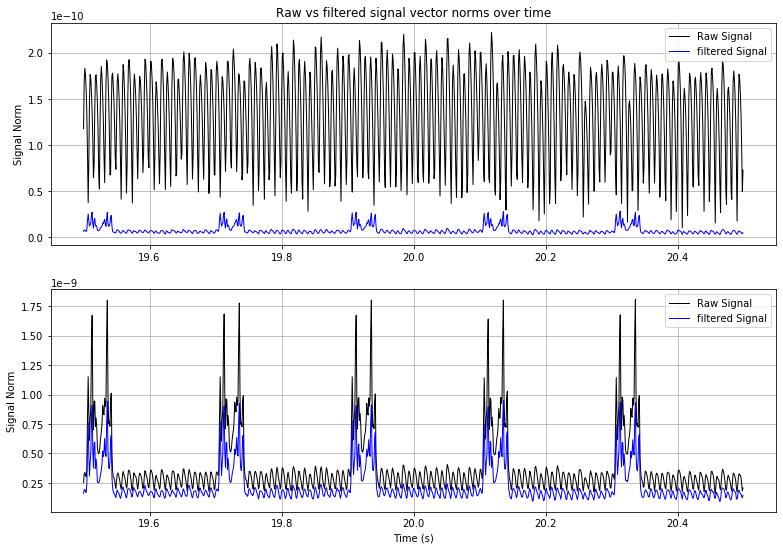

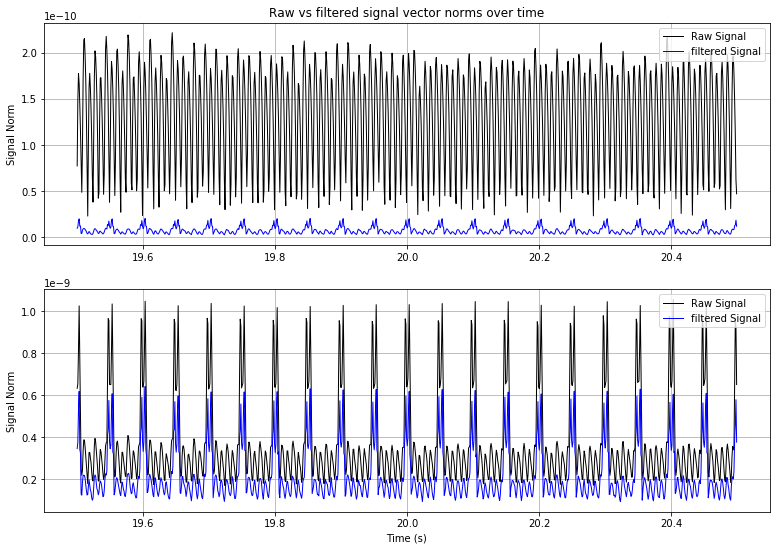

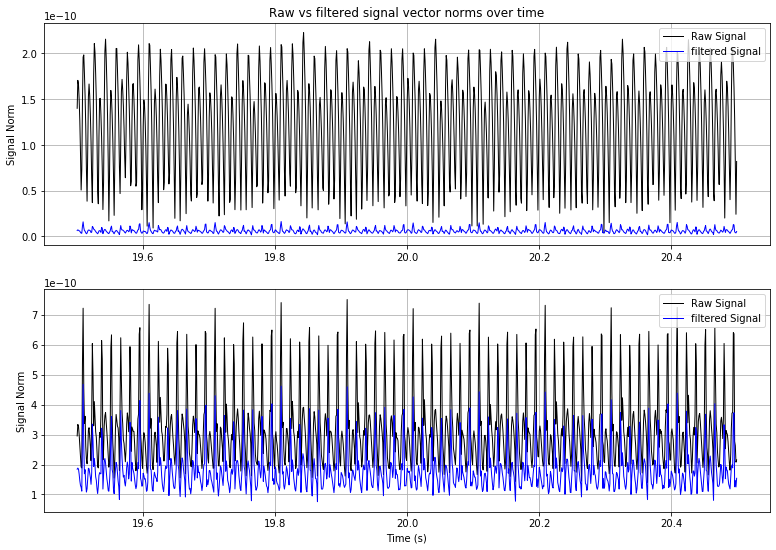

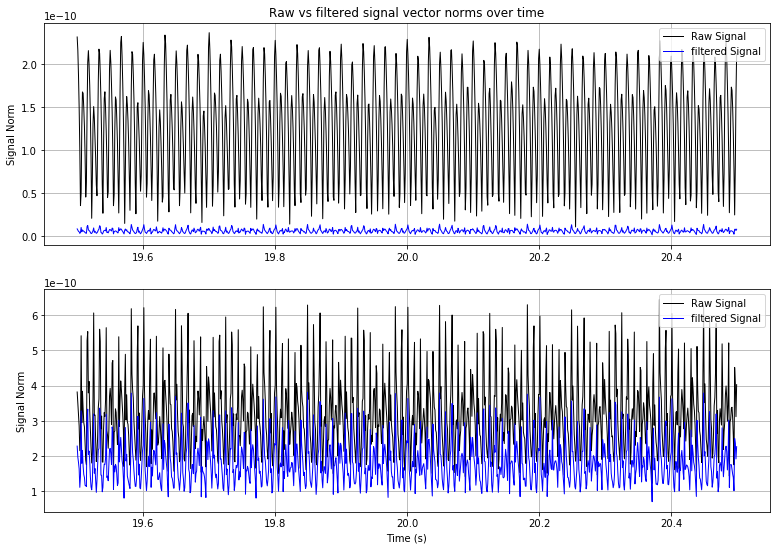

In [3]:
#   creating empty dictionary to hold data about calculated drops
drops = {}

#   For loop going through each freq, calculates drops and save it into
#   the empty drops{} dictionary, also plots signal norms
for i in ['5', '20', '70', '105']:
    
    #   setting dat to be a RecClass object, more info found in Funfile, also specify start and stop
    dat = Fun.RecClass(
        file_name = i+str(params['f_ext']),
        start = params[i]['start'],
        stop = params[i]['stop']
    )
                       
    #   plotting signal norms, only plotting the middle one second of each recording
    plot_norms_Sig_Norm_Analysis(dat.data, 19.5, 20.5)
    
    #   saving drops of this recording into drops{} dictionary.
    #   drop is calculated as rms or raw over rms of filtered.
    drops[i] = find_drop_Signal_Norm_Analysis(dat.data)
    
#   deleting i from the for loop, just trying to keep the code clean
del i

## Calculated drops

In [4]:
#   creates a header for printing the table of values from drop
print("{:<8} {:<15} {:<15}".format('Hz',
                                   'mag drop',
                                   'grad drop'))

#   for looping through all recording and printing calculated drops
#   currently rounded to 4th decimal place, change as desired
for i in ['5','20','70','105']:
    print("{:<8} {:<15} {:<15}".format(i,
                                       round(drops[i]['mdat'], 4),
                                       round(drops[i]['gdat'], 4)))
#   deleting i from the for loop
del i

Hz       mag drop        grad drop      
5        15.9923         1.7479         
20       17.5163         1.7607         
70       20.2358         1.7644         
105      21.7984         1.7566         


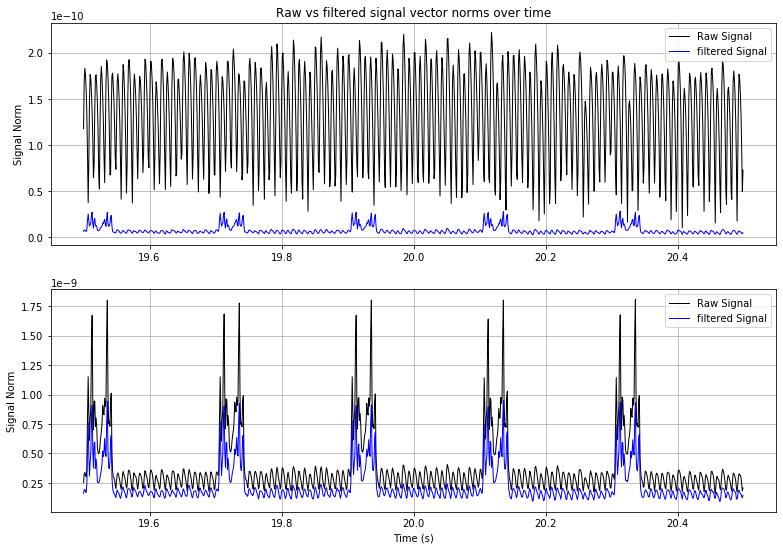

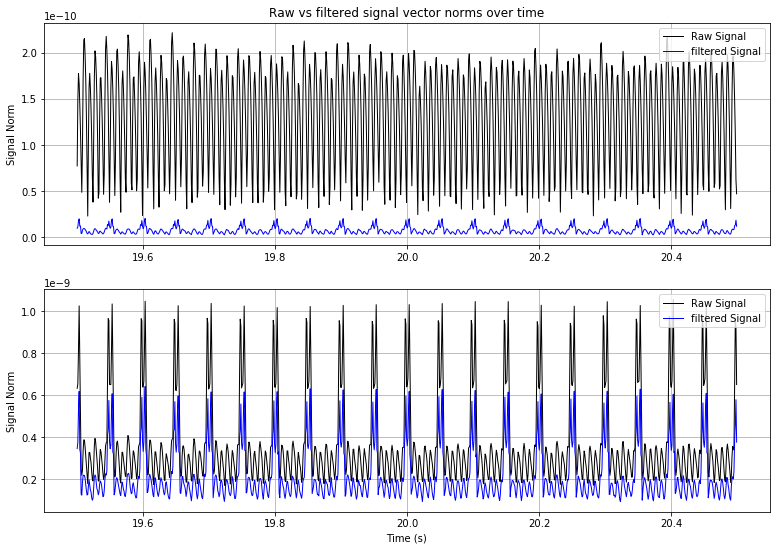

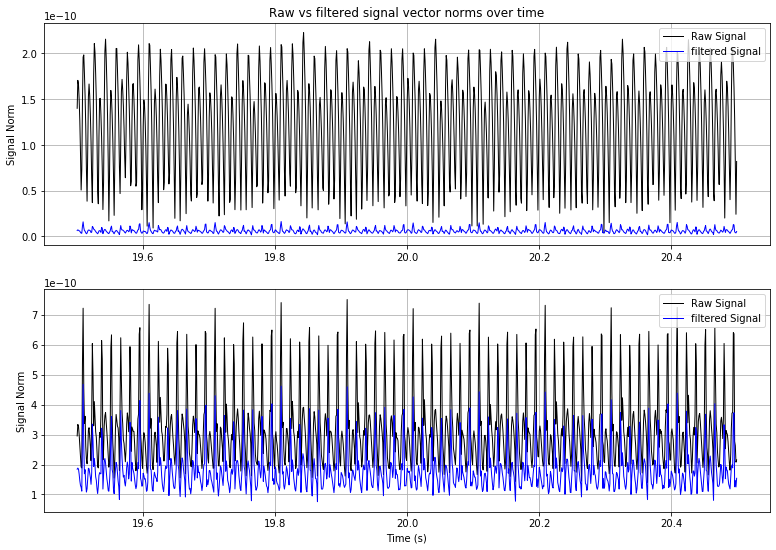

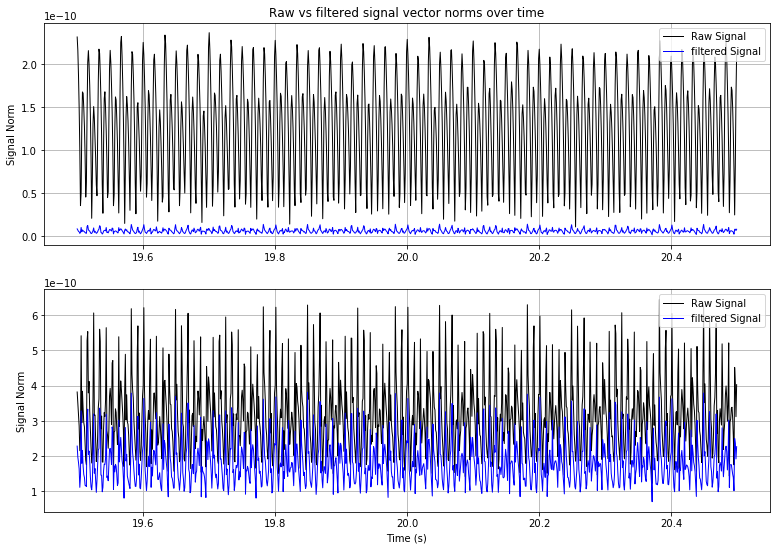

In [11]:
#   creating empty dictionary to hold data about calculated drops
order_drops = {}

#   For loop going through each freq, calculates drops and save it into
#   the empty drops{} dictionary, also plots signal norms
for i in ['5', '20', '70', '105']:
    
    #   setting dat to be a RecClass object, more info found in Funfile, also specify start and stop
    dat = Fun.RecClass_Order_Cal(
        file_name = i+str(params['f_ext']),
        start = params[i]['start'],
        stop = params[i]['stop'],
        internal = 8,
        external = 3,
        diag_cal_mat = Identity
    )
    #   plotting signal norms, only plotting the middle one second of each recording
    plot_norms_Sig_Norm_Analysis(dat.data, 19.5, 20.5)
    
    #   saving drops of this recording into drops{} dictionary.
    #   drop is calculated as rms or raw over rms of filtered.
    order_drops[i] = find_drop_Signal_Norm_Analysis(dat.data)
    
#   deleting i from the for loop, just trying to keep the code clean
del i

## Calculated drops

In [12]:
#   creates a header for printing the table of values from drop
print("{:<8} {:<15} {:<15}".format('Hz',
                                   'mag drop',
                                   'grad drop'))

#   for looping through all recording and printing calculated drops
#   currently rounded to 4th decimal place, change as desired
for i in ['5','20','70','105']:
    print("{:<8} {:<15} {:<15}".format(i,
                                       round(order_drops[i]['mdat'], 4),
                                       round(order_drops[i]['gdat'], 4)))
#   deleting i from the for loop
del i

Hz       mag drop        grad drop      
5        15.9923         1.7479         
20       17.5163         1.7607         
70       20.2358         1.7644         
105      21.7984         1.7566         
